# 📊 Exploración de Datos Financieros

Este notebook explora los datos históricos descargados de los activos financieros.


In [8]:
import sys
import os
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar configuración
with open('../config/settings.yaml', 'r') as f:
    config = yaml.safe_load(f)


## 1. Cargar Datos


In [9]:
# Cargar datos procesados
raw_path = config['data_source']['download_path']
processed_path = config['data_source']['processed_path']

# Cargar retornos
returns_df = pd.read_csv(f'../{processed_path}/returns.csv', index_col=0, parse_dates=True)
returns_df.head()


,stocks,bonds,gold,cash
2015-01-05,-0.018447,0.006083,0.014980,-1.609438
2015-01-06,-0.008933,0.006695,0.012711,1.897120
2015-01-07,0.011563,-0.000186,-0.007161,0.000000
2015-01-08,0.017730,-0.004086,-0.001819,-0.105361
2015-01-09,-0.008439,0.004921,0.006270,-0.182322


In [10]:
# Cargar estadísticas
stats_df = pd.read_csv(f'../{processed_path}/asset_statistics.csv')
stats_df


,asset,mean_return_annual,std_dev_annual,sharpe_ratio,observations
0,stocks,0.105209,0.178901,0.588084,2515
1,bonds,0.005885,0.067233,0.087535,2515
2,gold,0.079863,0.146874,0.543751,2512
3,cash,0.491419,3.833691,0.128184,2512


## 2. Análisis Descriptivo


In [11]:
# Estadísticas descriptivas
returns_df.describe()


,stocks,bonds,gold,cash
count,2515.000000,2515.000000,2512.000000,2512.000000
mean,0.000417,0.000023,0.000317,0.001950
std,0.011270,0.004235,0.009252,0.241500
min,-0.127652,-0.025392,-0.051069,-4.007333
25%,-0.003783,-0.002410,-0.004253,-0.008383
50%,0.000636,0.000099,0.000419,0.000000
75%,0.005739,0.002462,0.005452,0.010599
max,0.089683,0.026074,0.057775,2.538974


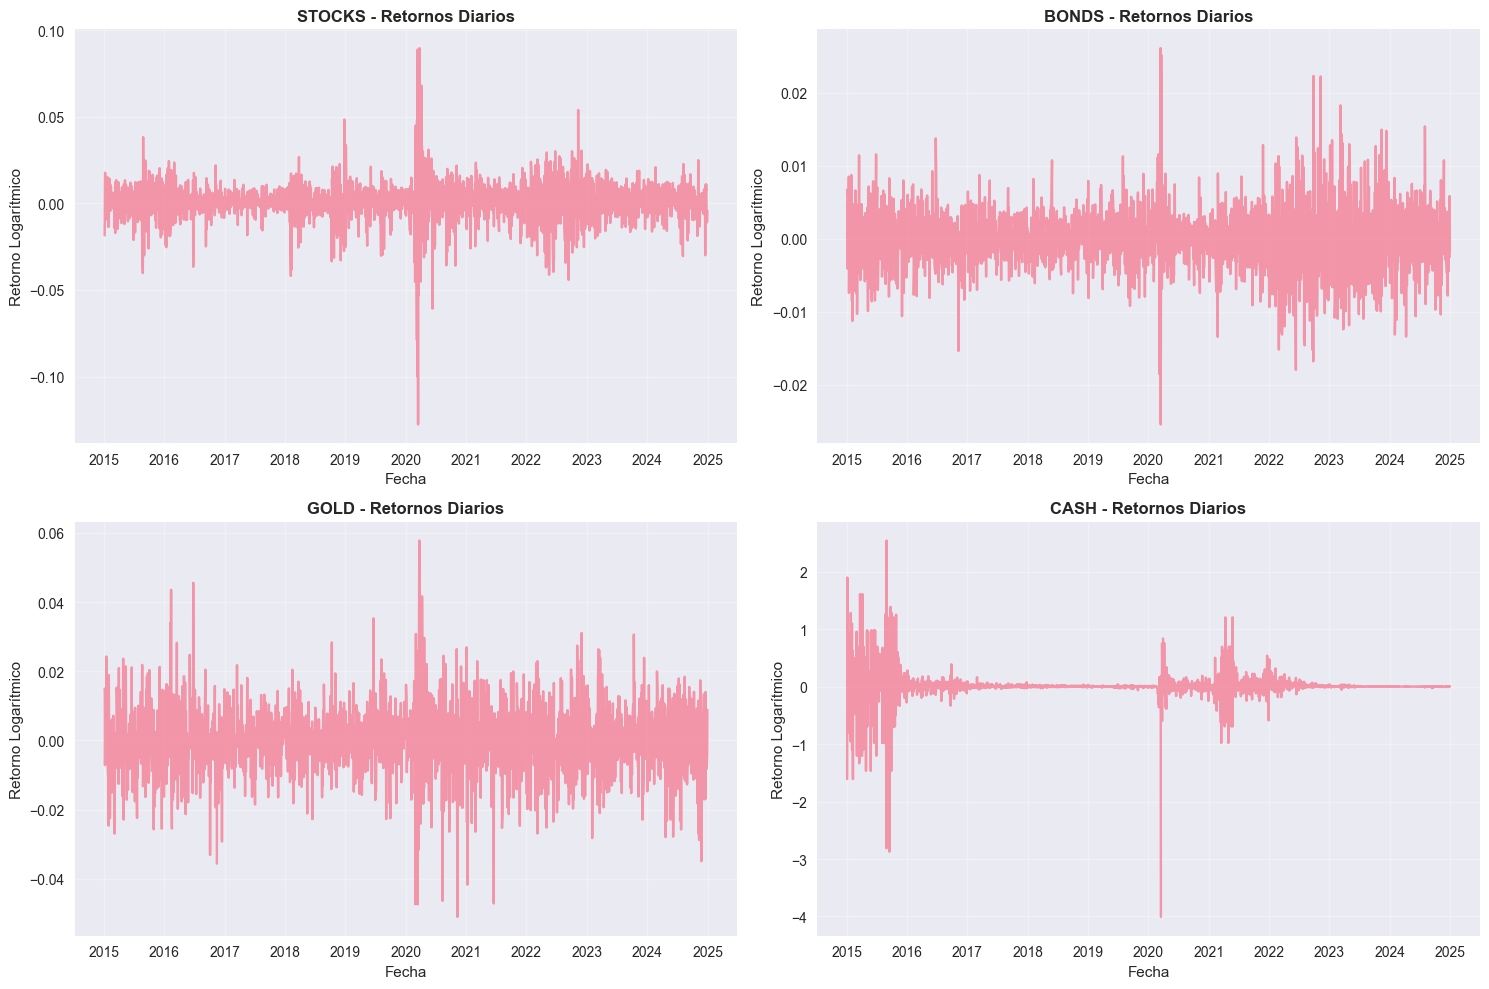

In [12]:
# Visualizar retornos históricos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, asset in enumerate(returns_df.columns):
    axes[idx].plot(returns_df.index, returns_df[asset], alpha=0.7)
    axes[idx].set_title(f'{asset.upper()} - Retornos Diarios', fontweight='bold')
    axes[idx].set_xlabel('Fecha')
    axes[idx].set_ylabel('Retorno Logarítmico')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Distribuciones y Correlaciones


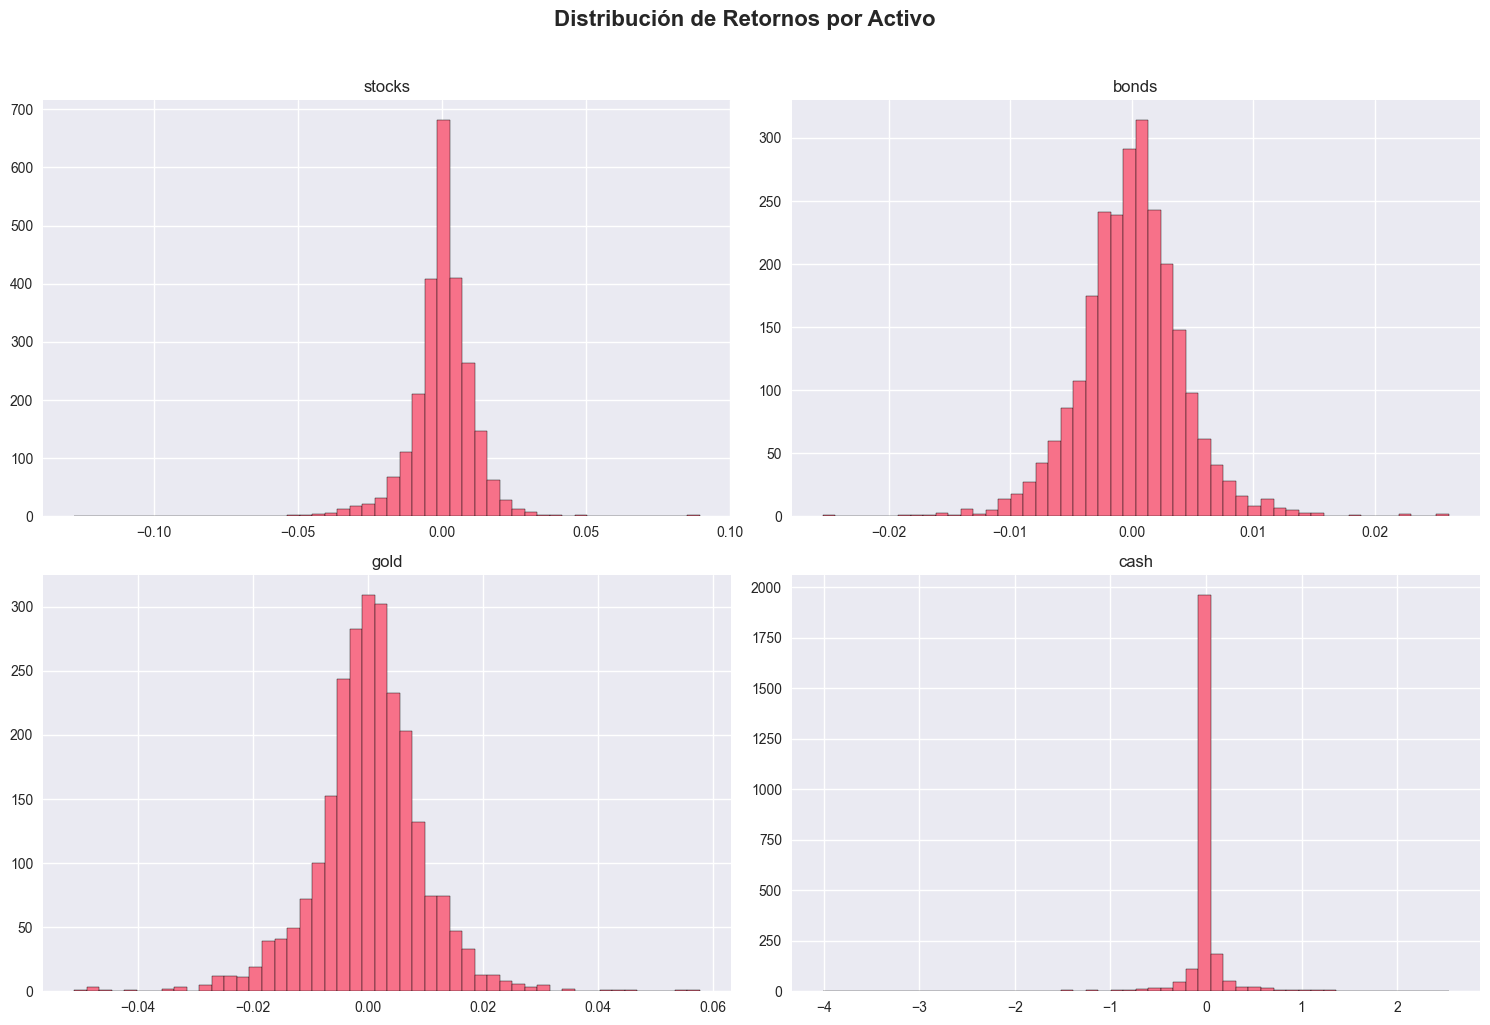

In [13]:
# Distribuciones de retornos
returns_df.hist(bins=50, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de Retornos por Activo', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


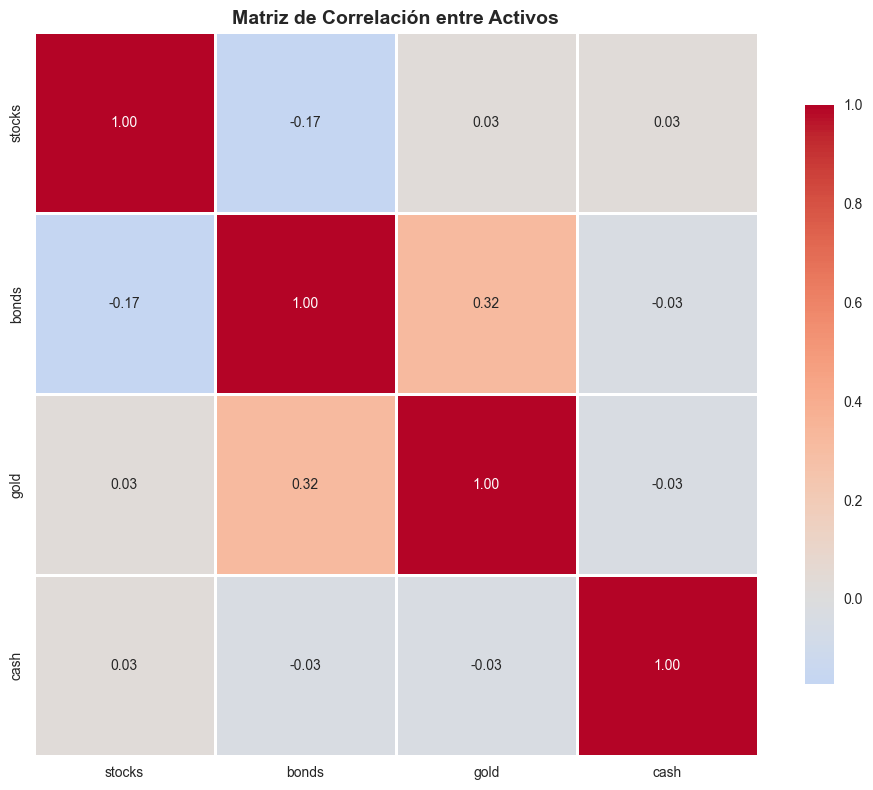

In [14]:
# Matriz de correlación
corr_matrix = returns_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Activos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
